# Import Data

In [1]:
import pandas as pd

train_data = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\Movie Genre Classification Dataset\train_data.txt", delimiter=' ::: ', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

test_data = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\Movie Genre Classification Dataset\test_data.txt", delimiter=' ::: ', engine='python', names=['ID', 'TITLE', 'DESCRIPTION'])

test_data_solution = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\Movie Genre Classification Dataset\test_data_solution.txt", delimiter=' ::: ', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

# Display first few rows of training data

In [2]:
print("Training Data Sample:")
train_data.head()

Training Data Sample:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [3]:
train_data.shape

(54214, 4)

In [4]:
# train_data.to_csv('train_data.csv', index=False)

# Testing Data

In [5]:
print("Testing Data Sample:")
test_data.head()

Testing Data Sample:


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


# Validation Data

In [6]:
print("Testing Data Solution Sample:")
test_data_solution.head()

Testing Data Solution Sample:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


# Information on training data

In [7]:
# Check information of validation data as we will be using this data to train te model
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


# Describe the data

In [8]:
train_data.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


# Check for missing values in the data

In [9]:
print("Missing values in train_data:")
print(train_data.isnull().sum())

print("\nMissing values in test_data:")
print(test_data.isnull().sum())

print("\nMissing values in test_data_solution:")
print(test_data_solution.isnull().sum())

Missing values in train_data:
ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

Missing values in test_data:
ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

Missing values in test_data_solution:
ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


# Visualize the data for further analysis

Plot for Genre Distribution in Training Data

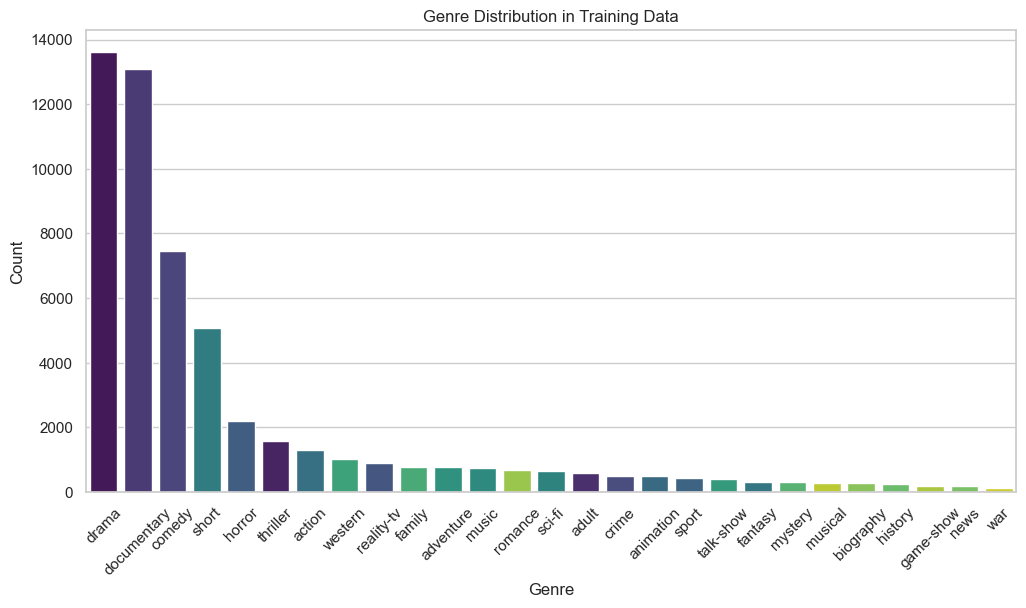

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='GENRE', order=train_data['GENRE'].value_counts().index, palette='viridis', hue=train_data['GENRE'])
plt.title("Genre Distribution in Training Data")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Plot for Description Length Distribution in Training Data

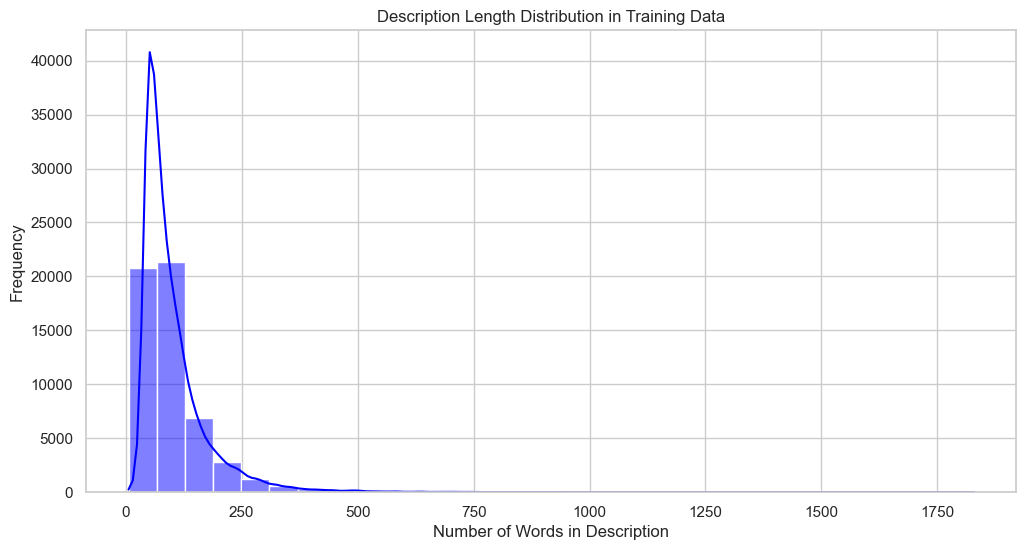

In [11]:
train_data['desc_length'] = train_data['DESCRIPTION'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(train_data['desc_length'], bins=30, kde=True, color='blue')
plt.title("Description Length Distribution in Training Data")
plt.xlabel("Number of Words in Description")
plt.ylabel("Frequency")
plt.show()

Plot to display WordCloud to analyse frequently used words

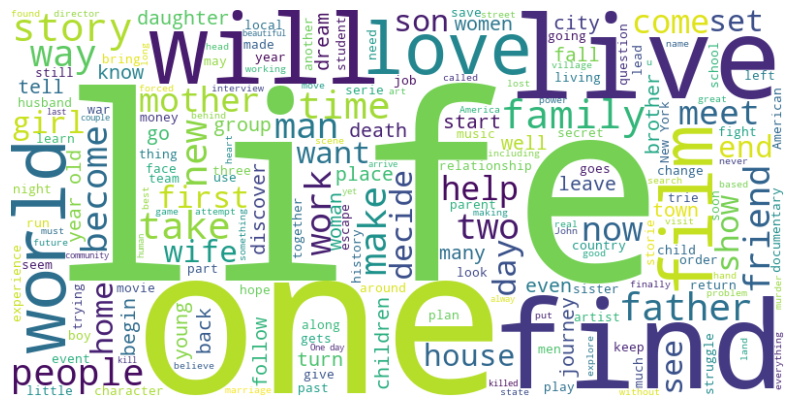

In [12]:
from wordcloud import WordCloud

all_text = " ".join(train_data['DESCRIPTION'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Preprocessing

Text Normalization

In [13]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(clean_text)
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].apply(clean_text)

# Feature Extraction

TF_IDF technique to convert descriptions of movie into numerical features

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_data['DESCRIPTION'])
y_train = train_data['GENRE']

X_test = vectorizer.transform(test_data['DESCRIPTION'])

# Modelling

Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Predicting Logistic Regression Model

In [16]:
LR_predictions = LR_model.predict(X_test)

# Get probability scores for ROC and PR curves
LR_y_score = LR_model.predict_proba(X_test)

Evaluate the model with metrics

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Calculate accuracy by comparing predictions to the true genres
LR_accuracy = accuracy_score(test_data_solution['GENRE'], LR_predictions)
LR_precision = precision_score(test_data_solution['GENRE'], LR_predictions, average='weighted')
LR_recall = recall_score(test_data_solution['GENRE'], LR_predictions, average='weighted')
LR_f1_score = f1_score(test_data_solution['GENRE'], LR_predictions, average='weighted')

print(f"Model Accuracy - Logistic Regression: {LR_accuracy}")
print(f"Model Precision - Logistic Regression: {LR_precision:.2f}")
print(f"Model Recall - Logistic Regression: {LR_recall:.2f}")
print(f"Model F1 Score - Logistic Regression: {LR_f1_score:.2f}")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Accuracy - Logistic Regression: 0.5823985239852398
Model Precision - Logistic Regression: 0.56
Model Recall - Logistic Regression: 0.58
Model F1 Score - Logistic Regression: 0.54


Classification Report for Logistic Regression

In [18]:
print("\nClassification Report - Logistic Regression:")
print(classification_report(test_data_solution['GENRE'], LR_predictions))


Classification Report - Logistic Regression:


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.48      0.28      0.36      1314
       adult       0.60      0.23      0.33       590
   adventure       0.58      0.16      0.26       775
   animation       0.48      0.06      0.11       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.58      0.55      7446
       crime       0.34      0.04      0.07       505
 documentary       0.67      0.85      0.75     13096
       drama       0.54      0.77      0.64     13612
      family       0.51      0.09      0.15       783
     fantasy       0.58      0.06      0.10       322
   game-show       0.91      0.51      0.65       193
     history       0.00      0.00      0.00       243
      horror       0.64      0.57      0.60      2204
       music       0.67      0.44      0.53       731
     musical       0.32      0.02      0.04       276
     mystery       0.30      0.01      0.02       318
        news       0.69    

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Curve for Logistice Regression

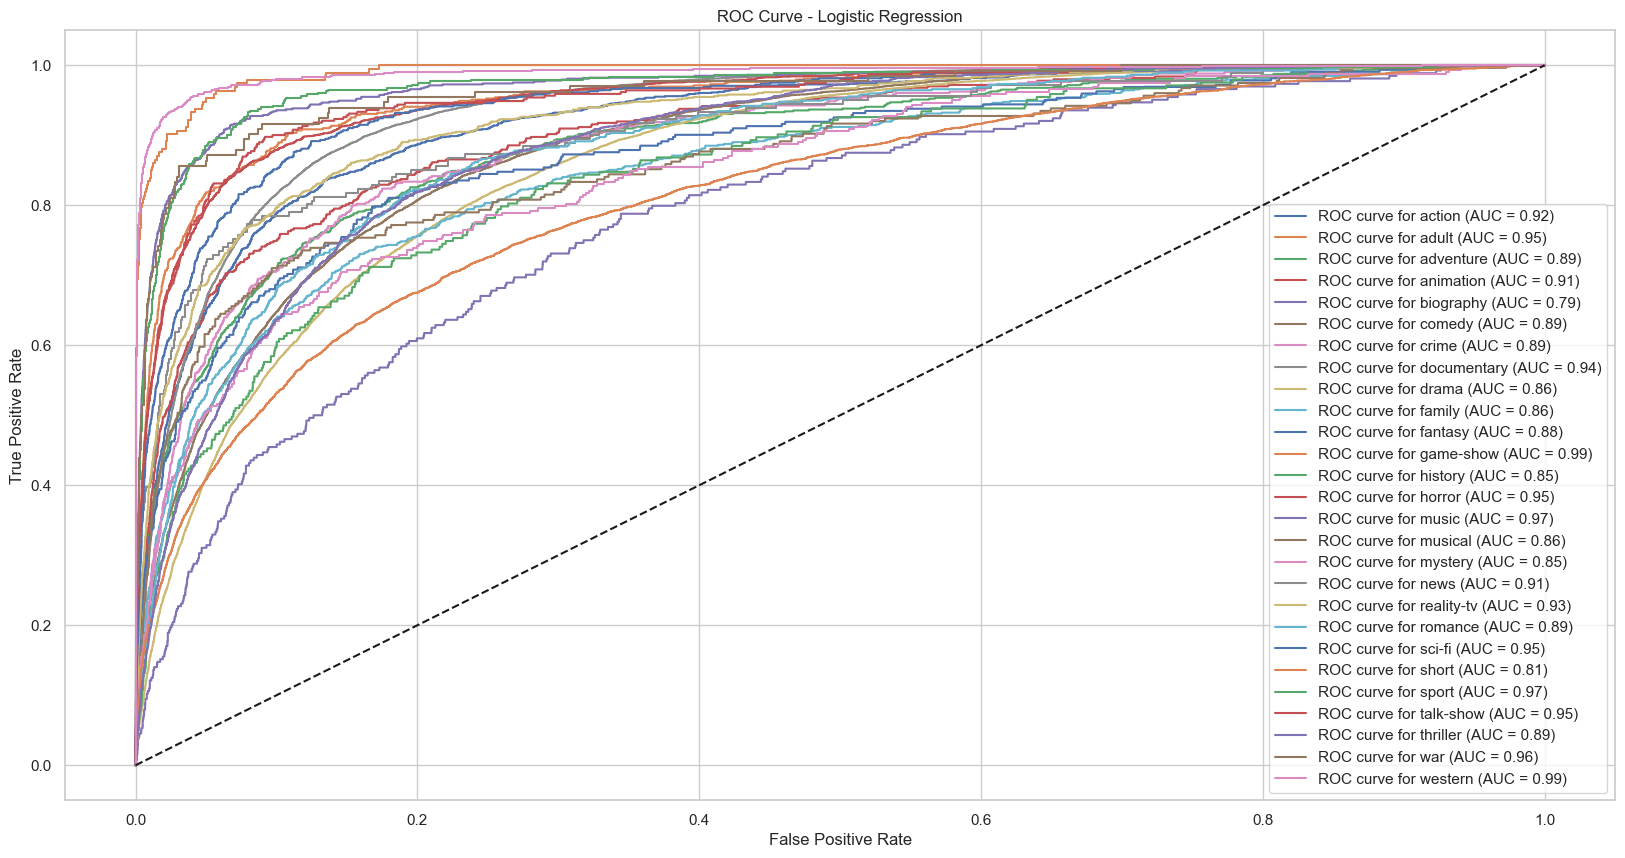

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binarized_LR = label_binarize(test_data_solution['GENRE'], classes=LR_model.classes_)
n_classes = y_test_binarized_LR.shape[1]

plt.figure(figsize=(20, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized_LR[:, i], LR_y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for {LR_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Precision Recall Curve for Logistic Regression

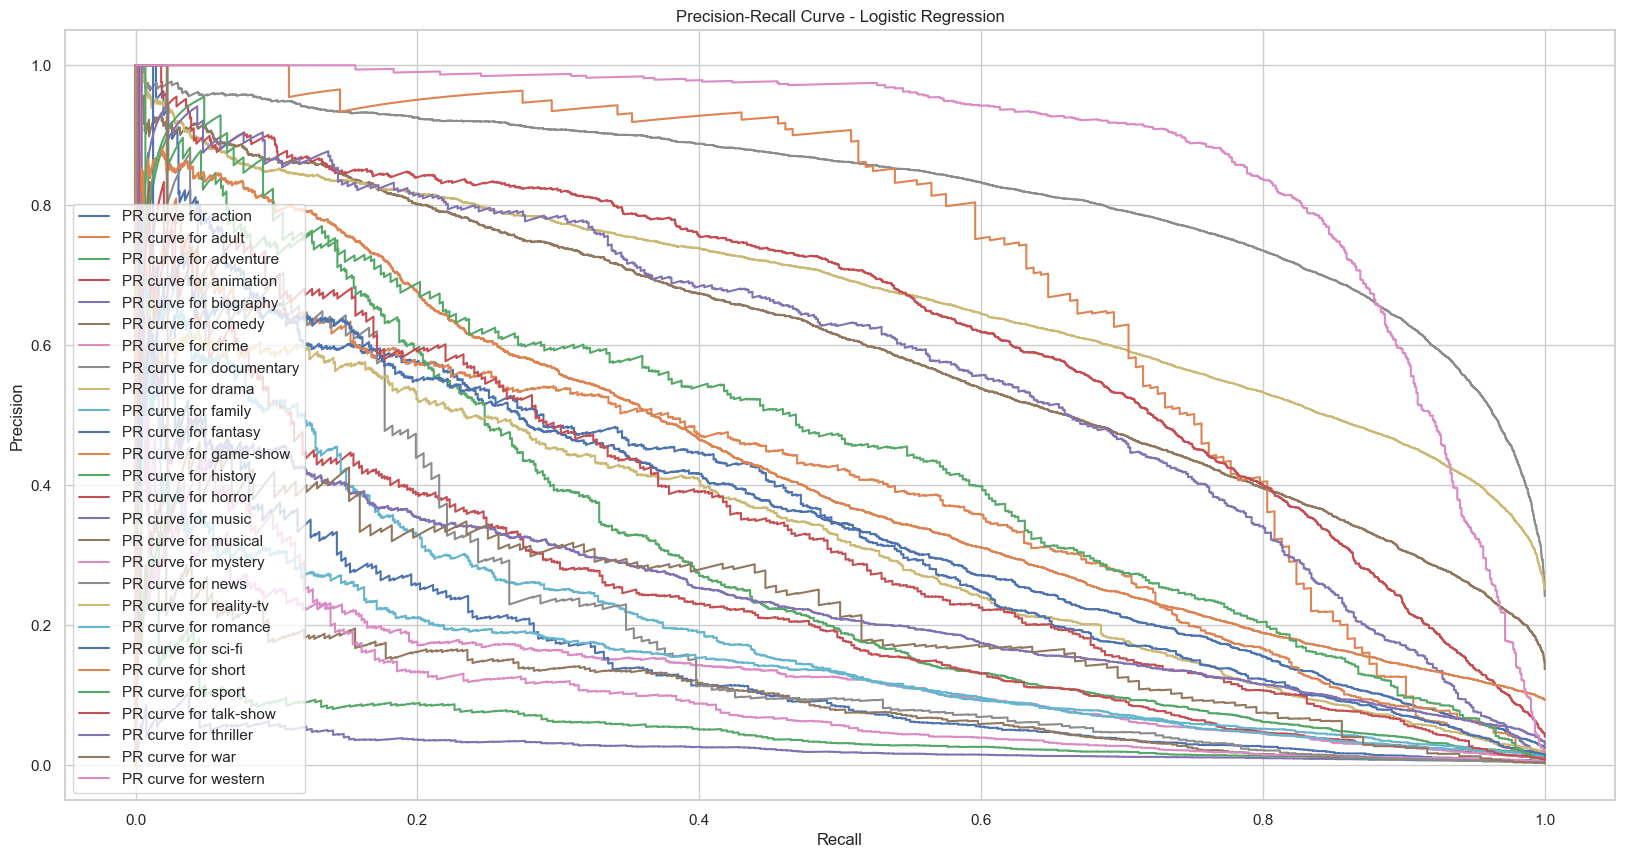

In [36]:
from sklearn.metrics import precision_recall_curve

# Plot Precision-Recall Curve for Logistic Regression
plt.figure(figsize=(20, 10))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized_LR[:, i], LR_y_score[:, i])
    plt.plot(recall, precision, label=f'PR curve for {LR_model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.show()

Naive Bayes Model

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Predicting Naive Bayes Model

In [ ]:
NB_predictions = nb_model.predict(X_test)

NB_y_score = nb_model.predict_proba(X_test)

Evaluating Naive Bayes Model

In [23]:
NB_accuracy = accuracy_score(test_data_solution['GENRE'], NB_predictions)
NB_precision = precision_score(test_data_solution['GENRE'], NB_predictions, average='macro')
NB_recall = recall_score(test_data_solution['GENRE'], NB_predictions, average='macro')
NB_f1_score = f1_score(test_data_solution['GENRE'], NB_predictions, average='macro')

print(f"Naive Bayes Model Accuracy: {NB_accuracy:.2f}")
print(f"Naive Bayes Model Precision (Macro Average): {NB_precision:.2f}")
print(f"Naive Bayes Model Recall (Macro Average): {NB_recall:.2f}")
print(f"Naive Bayes Model F1 Score (Macro Average): {NB_f1_score:.2f}")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes Model Accuracy: 0.52
Naive Bayes Model Precision (Macro Average): 0.37
Naive Bayes Model Recall (Macro Average): 0.15
Naive Bayes Model F1 Score (Macro Average): 0.17


Classification Report for Naive Bayes

In [24]:
print("\nClassification Report - Naive Bayes:")
print(classification_report(test_data_solution['GENRE'], NB_predictions))


Classification Report - Naive Bayes:


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.56      0.11      0.18      1314
       adult       0.47      0.05      0.10       590
   adventure       0.73      0.07      0.12       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.52      0.42      0.47      7446
       crime       0.00      0.00      0.00       505
 documentary       0.57      0.87      0.69     13096
       drama       0.46      0.83      0.59     13612
      family       0.50      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.97      0.33      0.49       193
     history       0.00      0.00      0.00       243
      horror       0.70      0.36      0.47      2204
       music       0.76      0.15      0.26       731
     musical       0.00      0.00      0.00       276
     mystery       0.00      0.00      0.00       318
        news       0.00    

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Curve for Naive Bayes

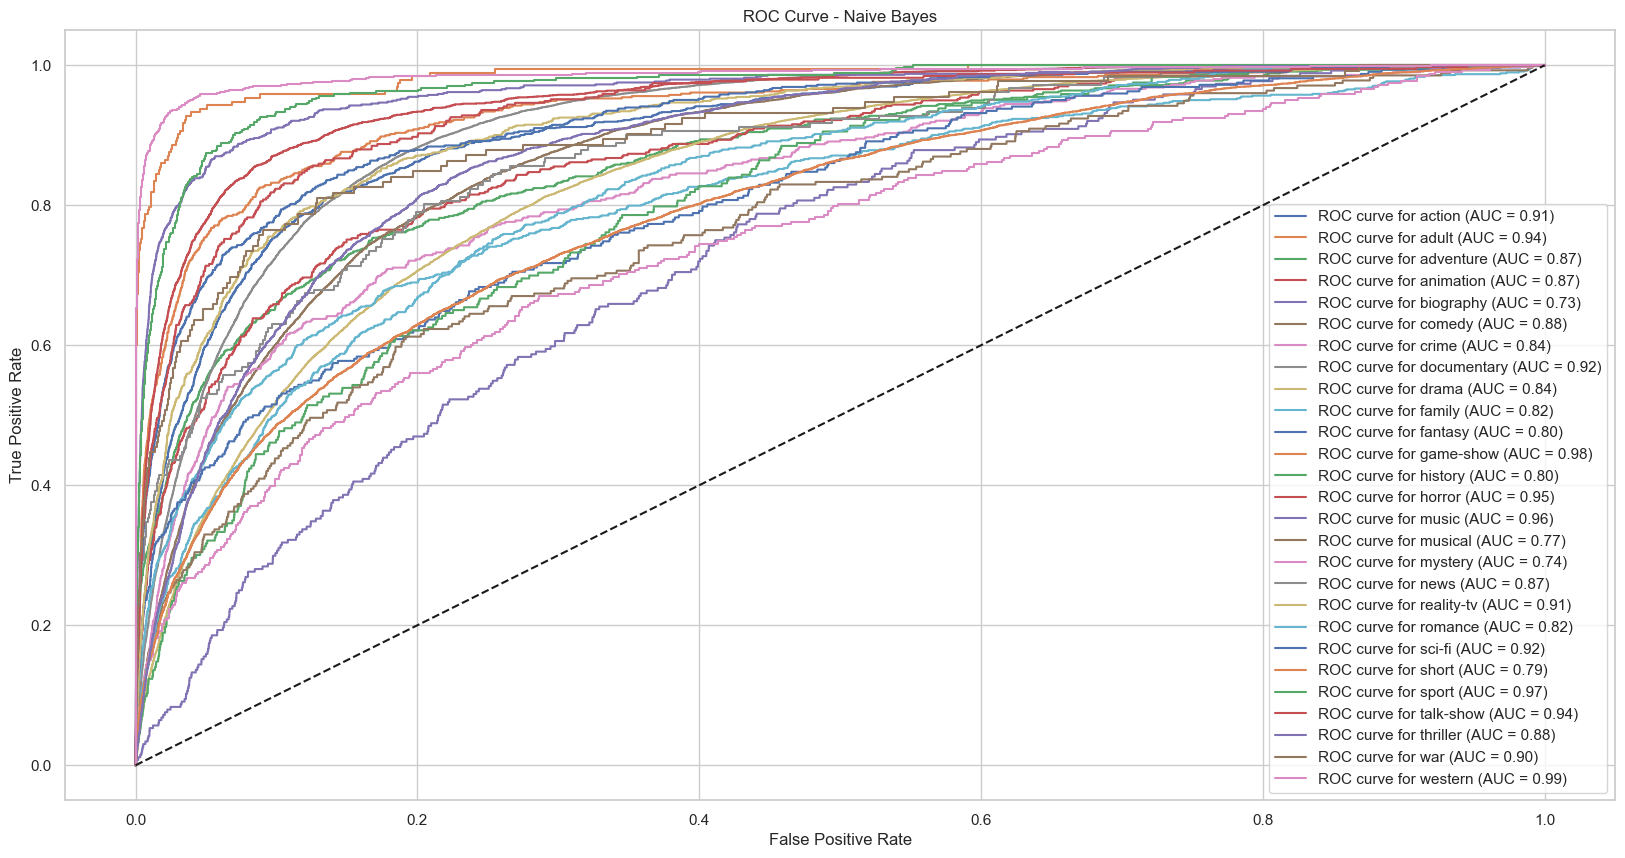

In [35]:
y_test_binarized_nb = label_binarize(test_data_solution['GENRE'], classes=nb_model.classes_)
n_classes = y_test_binarized_nb.shape[1]

plt.figure(figsize=(20, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized_nb[:, i], NB_y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for {nb_model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

Precision Recall Curve for Naive Bayes

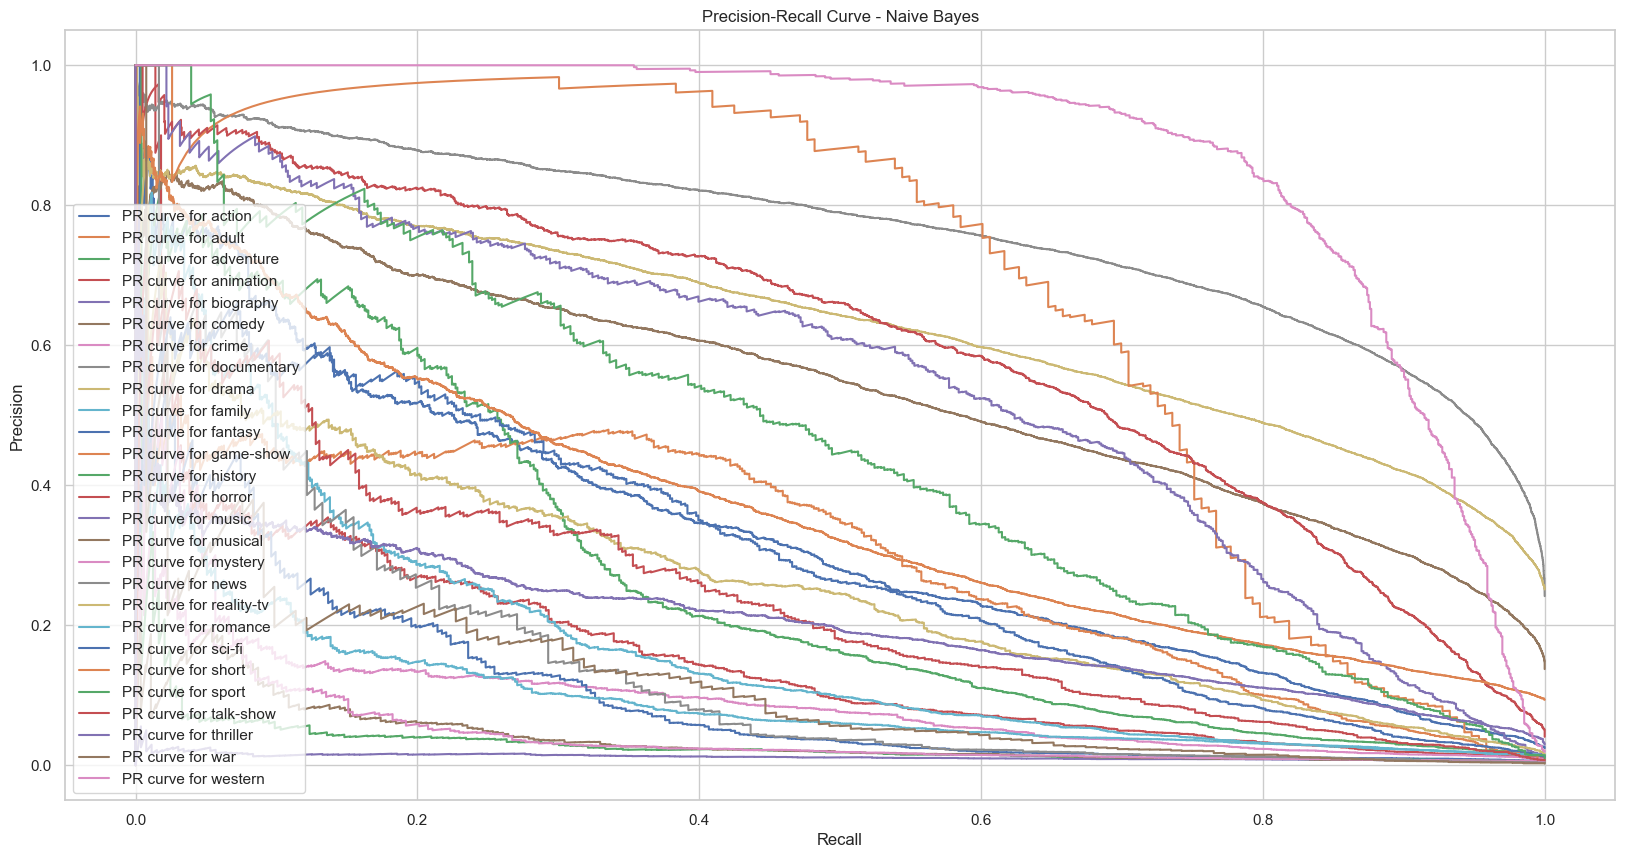

In [34]:
plt.figure(figsize=(20,10))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized_nb[:, i], NB_y_score[:, i])
    plt.plot(recall, precision, label=f'PR curve for {nb_model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.legend(loc='lower left')
plt.show()